In [1]:
from src.kernel_pca.kpca import KernelPCA
from src.kernel_pca.kernels import RBFKernel, PolynomialKernel, SigmoidKernel, LinearKernel

import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles

In [2]:
X_circles, y = make_circles(n_samples=1000, noise=0.03, factor=0.2, random_state=0)
c1_idx_circles = y == 0
c2_idx_circles = y == 1

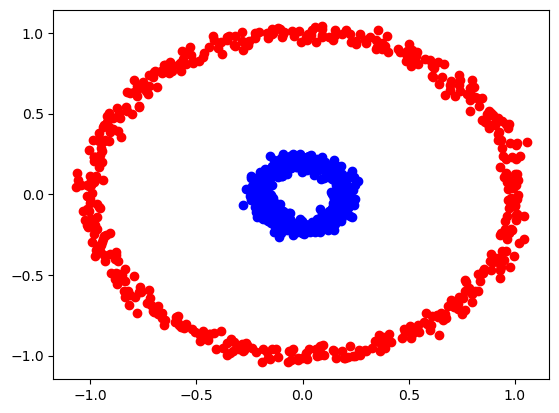

In [3]:
plt.scatter(X_circles[c1_idx_circles, 0], X_circles[c1_idx_circles, 1], color='red')
plt.scatter(X_circles[c2_idx_circles, 0], X_circles[c2_idx_circles, 1], color='blue')
plt.show()

In [4]:
linear_pca = KernelPCA(kernel=LinearKernel(), n_components=1)
X_linear_pca = linear_pca.fit_transform(X_circles)

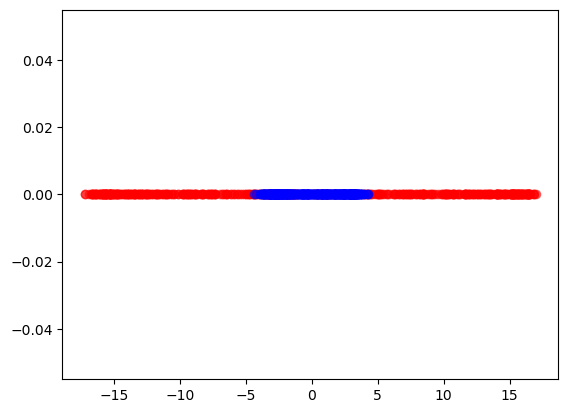

In [5]:
plt.scatter(X_linear_pca[c1_idx_circles], np.zeros_like(X_linear_pca[c1_idx_circles]), color='red', alpha=0.5)
plt.scatter(X_linear_pca[c2_idx_circles], np.zeros_like(X_linear_pca[c2_idx_circles]), color='blue', alpha=0.5)

It's clear that the data is not linearly separable. But it can be separated in a higher dimensional space with a non-linear transformation.

In [10]:
radius = 2 * (X_circles[:, 0] ** 2 + X_circles[:, 1] ** 2)
X_3D = np.column_stack([X_circles, radius])
X_3D

array([[ 2.12255328e-01, -8.03286455e-04,  9.01059388e-02],
       [-1.46602890e-02, -1.54181710e-01,  4.79738473e-02],
       [-8.12506062e-01, -6.24243992e-01,  2.09969333e+00],
       ...,
       [-2.19712503e-03,  1.38179072e-01,  3.81965666e-02],
       [ 1.65125981e-01,  1.23855625e-01,  8.52136105e-02],
       [-1.52106486e-01,  1.30001854e-01,  8.00737302e-02]])

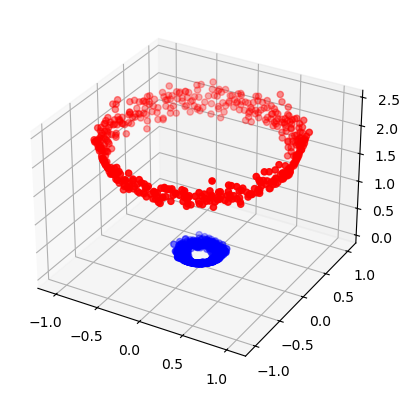

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[c1_idx_circles, 0], X_3D[c1_idx_circles, 1], X_3D[c1_idx_circles, 2], color='red')
ax.scatter(X_3D[c2_idx_circles, 0], X_3D[c2_idx_circles, 1], X_3D[c2_idx_circles, 2], color='blue')
plt.show()

In [12]:
linear_pca = KernelPCA(kernel=LinearKernel(), n_components=2)
X_linear_pca = linear_pca.fit_transform(X_3D)

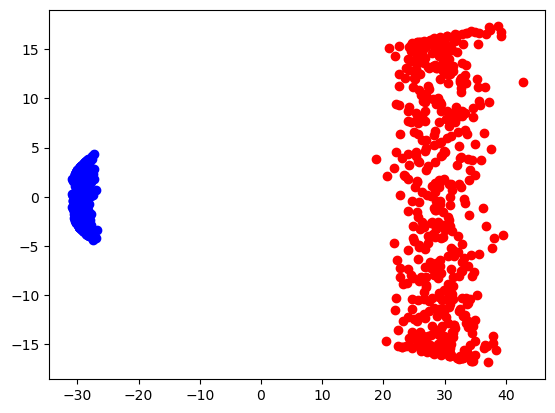

In [13]:
plt.scatter(X_linear_pca[c1_idx_circles, 0], X_linear_pca[c1_idx_circles, 1], color='red')
plt.scatter(X_linear_pca[c2_idx_circles, 0], X_linear_pca[c2_idx_circles, 1], color='blue')

In [14]:
linear_pca = KernelPCA(kernel=LinearKernel(), n_components=1)
X_linear_pca = linear_pca.fit_transform(X_3D)

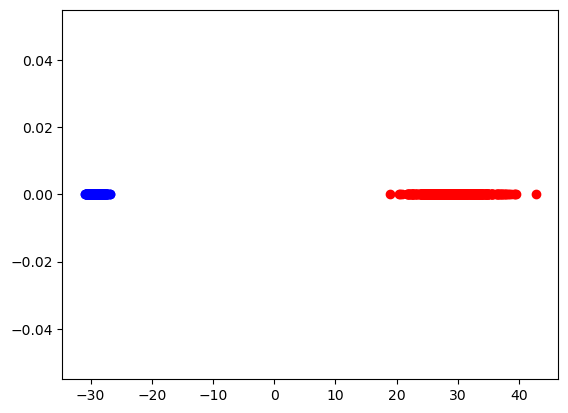

In [15]:
plt.scatter(X_linear_pca[c1_idx_circles], np.zeros_like(X_linear_pca[c1_idx_circles]), color='red')
plt.scatter(X_linear_pca[c2_idx_circles], np.zeros_like(X_linear_pca[c2_idx_circles]), color='blue')

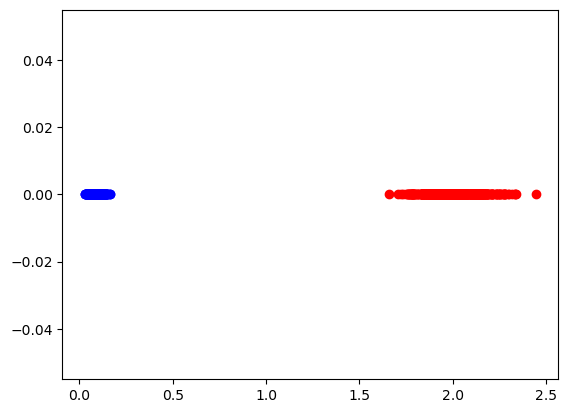

In [224]:
plt.scatter(radius[c1_idx_circles], np.zeros_like(radius[c1_idx_circles]), color='red')
plt.scatter(radius[c2_idx_circles], np.zeros_like(radius[c2_idx_circles]), color='blue')

Lets try to use more complex kernel functions.

In [225]:
rbf_pca = KernelPCA(kernel=RBFKernel(gamma=1.5), n_components=2)
X_rbf_pca_circles = rbf_pca.fit_transform(X_circles)

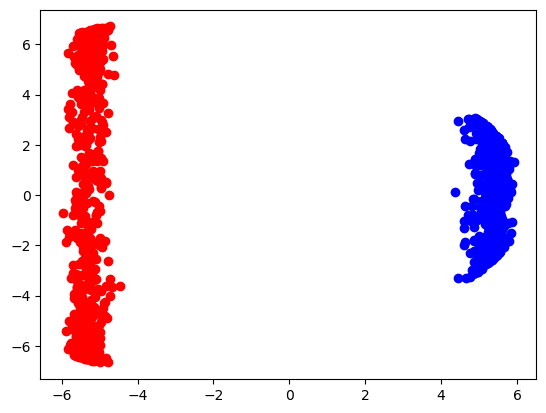

In [226]:
plt.scatter(X_rbf_pca_circles[c1_idx_circles, 0], X_rbf_pca_circles[c1_idx_circles, 1], color='red')
plt.scatter(X_rbf_pca_circles[c2_idx_circles, 0], X_rbf_pca_circles[c2_idx_circles, 1], color='blue')

In [227]:
poly_pca = KernelPCA(kernel=PolynomialKernel(degree=3, coef0=2, gamma=2), n_components=2)
X_poly_pca = poly_pca.fit_transform(X_circles)

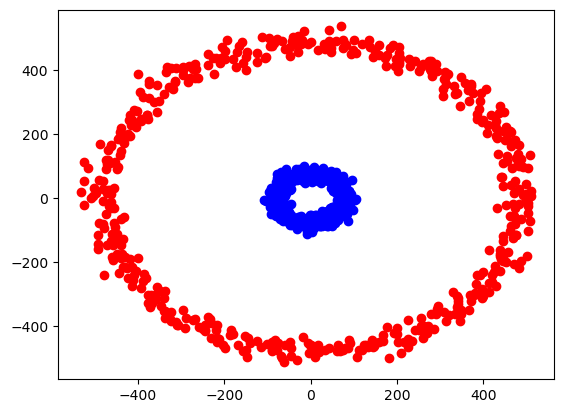

In [228]:
plt.scatter(X_poly_pca[c1_idx_circles, 0], X_poly_pca[c1_idx_circles, 1], color='red')
plt.scatter(X_poly_pca[c2_idx_circles, 0], X_poly_pca[c2_idx_circles, 1], color='blue')

In [229]:
sigmoid_pca = KernelPCA(kernel=SigmoidKernel(gamma=-10, coef0=4), n_components=2)
X_sigmoid_pca = sigmoid_pca.fit_transform(X_circles)

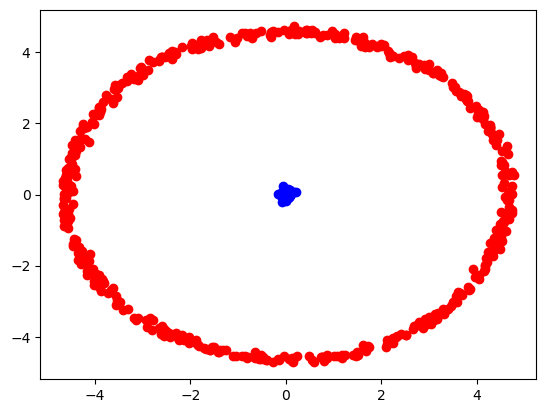

In [230]:
plt.scatter(X_sigmoid_pca[c1_idx_circles, 0], X_sigmoid_pca[c1_idx_circles, 1], color='red')
plt.scatter(X_sigmoid_pca[c2_idx_circles, 0], X_sigmoid_pca[c2_idx_circles, 1], color='blue')

In [231]:
X_moons, y = make_moons(n_samples=1000, noise=0.01, random_state=0)
c1_idx_moons = y == 0
c2_idx_moons = y == 1

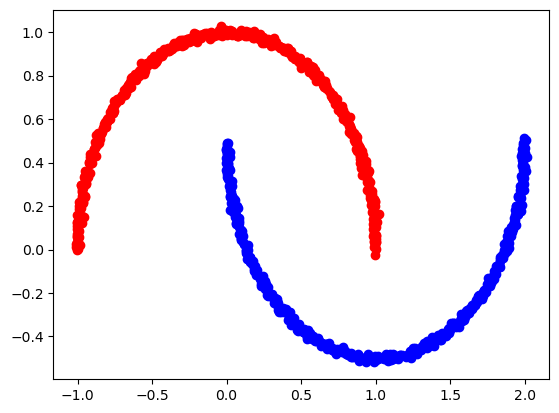

In [232]:
plt.scatter(X_moons[c1_idx_moons, 0], X_moons[c1_idx_moons, 1], color='red')
plt.scatter(X_moons[c2_idx_moons, 0], X_moons[c2_idx_moons, 1], color='blue')
plt.show()

In [233]:
rbf_pca = KernelPCA(kernel=RBFKernel(gamma=20), n_components=2)
X_rbf_pca_moons = rbf_pca.fit_transform(X_moons)

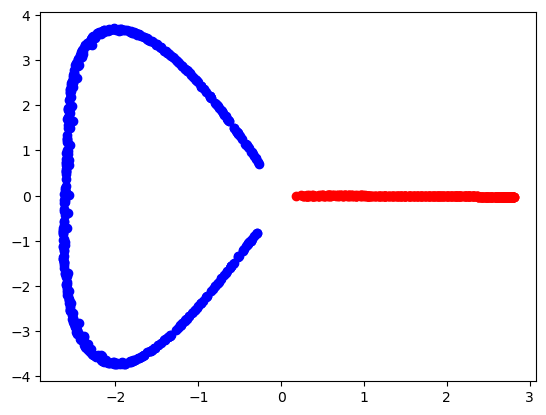

In [234]:
plt.scatter(X_rbf_pca_moons[c1_idx_moons, 0], X_rbf_pca_moons[c1_idx_moons, 1], color='red')
plt.scatter(X_rbf_pca_moons[c2_idx_moons, 0], X_rbf_pca_moons[c2_idx_moons, 1], color='blue')

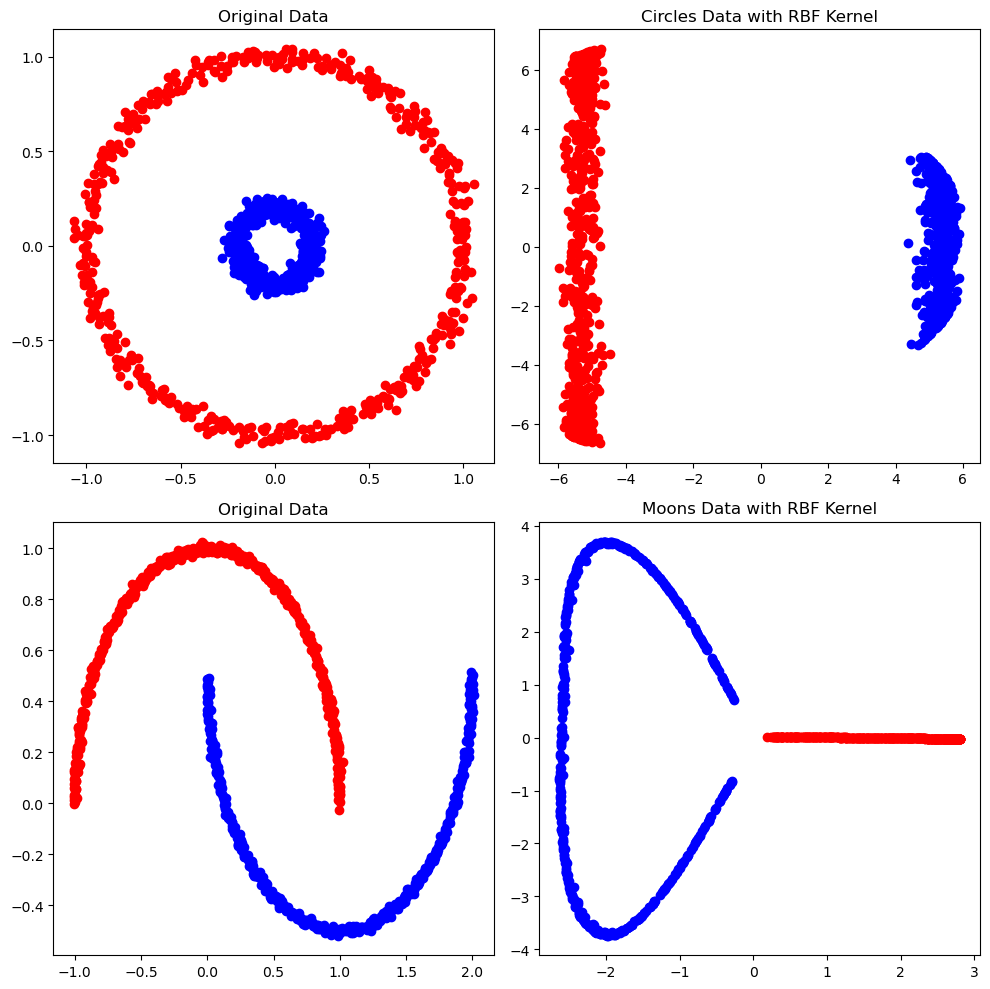

In [237]:
fig, ((circles_original_ax, circles_pca_ax), (moons_original_ax, moons_pca_ax)) = plt.subplots(2, 2, figsize=(10, 10))

circles_original_ax.scatter(X_circles[c1_idx_circles, 0], X_circles[c1_idx_circles, 1], color='red')
circles_original_ax.scatter(X_circles[c2_idx_circles, 0], X_circles[c2_idx_circles, 1], color='blue')
circles_original_ax.set_title('Original Data')

circles_pca_ax.scatter(X_rbf_pca_circles[c1_idx_circles, 0], X_rbf_pca_circles[c1_idx_circles, 1], color='red')
circles_pca_ax.scatter(X_rbf_pca_circles[c2_idx_circles, 0], X_rbf_pca_circles[c2_idx_circles, 1], color='blue')
circles_pca_ax.set_title('Circles Data with RBF Kernel')

moons_original_ax.scatter(X_moons[c1_idx_moons, 0], X_moons[c1_idx_moons, 1], color='red')
moons_original_ax.scatter(X_moons[c2_idx_moons, 0], X_moons[c2_idx_moons, 1], color='blue')
moons_original_ax.set_title('Original Data')

moons_pca_ax.scatter(X_rbf_pca_moons[c1_idx_moons, 0], X_rbf_pca_moons[c1_idx_moons, 1], color='red')
moons_pca_ax.scatter(X_rbf_pca_moons[c2_idx_moons, 0], X_rbf_pca_moons[c2_idx_moons, 1], color='blue')
moons_pca_ax.set_title('Moons Data with RBF Kernel')

plt.tight_layout()

plt.savefig('../../resources/methods/kpca.png', transparent=True)